<a href="https://colab.research.google.com/github/zainali60/Deep-learning/blob/main/FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)

2.5.0


In [2]:
from numpy.random import seed
seed(1)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
#create an array to access the class name based on label number.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
print(len(train_images),len(test_images))

60000 10000


In [11]:
#Check shape of training image
train_images[0].shape


(28, 28)

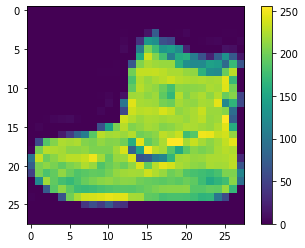

In [12]:
#check the range of pixel values
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
#plt.grid(True)
plt.grid(False)
plt.show()

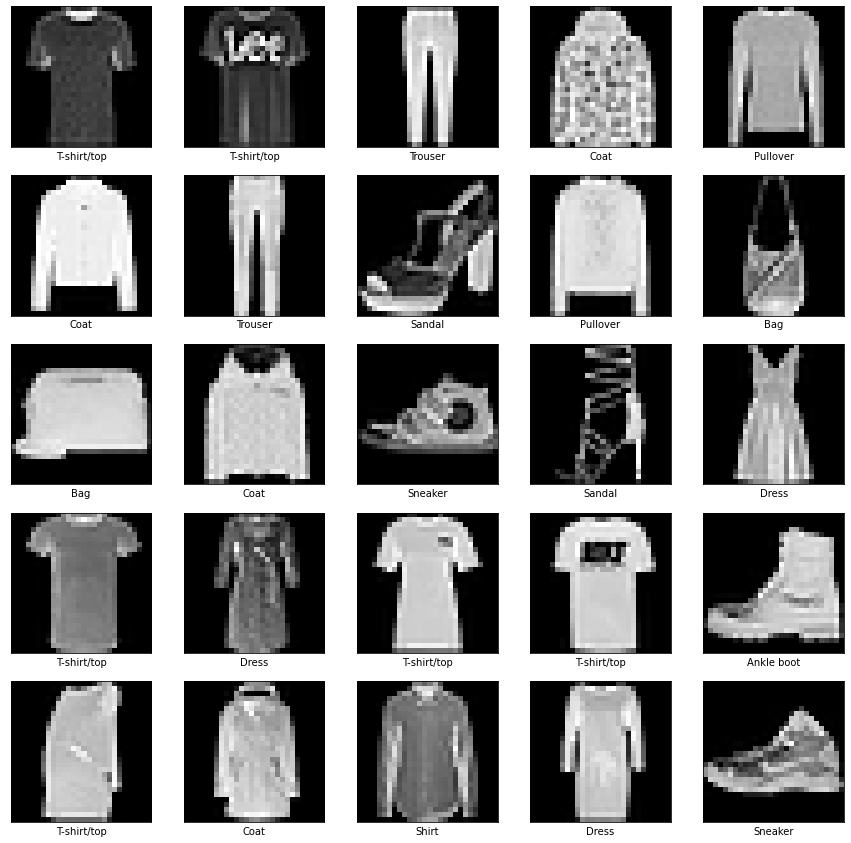

In [13]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0,len(train_images))
  plt.imshow(train_images[rand_no], cmap='gray')
  plt.xlabel(class_names[train_labels[rand_no]])

In [14]:
#Normalizing the pixel values
train_images = train_images.reshape(len(train_images), 28 * 28)
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape(len(test_images), 28 * 28)
test_images = test_images.astype('float32') / 255

In [15]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [16]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)


Epoch 1/10
469/469 [==============================] - 19s 10ms/step - loss: 0.7324 - accuracy: 0.7480
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3944 - accuracy: 0.8560
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3413 - accuracy: 0.8732
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3147 - accuracy: 0.8844
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2941 - accuracy: 0.8916
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2751 - accuracy: 0.8979
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2650 - accuracy: 0.8990
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2527 - accuracy: 0.9057
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2426 - accuracy: 0.9121
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2316 - accur

In [19]:
#model.fit(x=train_images,y=train_labels,epochs=20,validation_split=0.2,callbacks=[tensorboard_callback,earlystopping_callback])

In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3635 - accuracy: 0.8794


In [21]:
predictions = network.predict(test_images)
predictions[0]

array([5.45233654e-08, 3.97172226e-11, 1.61725899e-09, 1.13974684e-10,
       2.32753705e-10, 2.98233400e-03, 2.45328007e-08, 4.83979471e-03,
       2.88707778e-08, 9.92177784e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
predictions.shape

(10000, 10)

In [24]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

TypeError: ignored

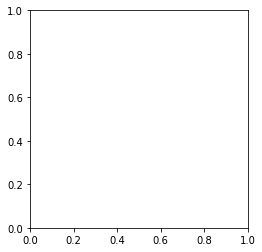

In [25]:
plt.imshow(test_images[0],cmap='gray')
